*Ticks Dataset Project*

Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Sample Dataset Creation with Python

In [6]:
import pandas as pd

# Sample data
data = {
    'id': [1, 2, 3, 4, 5, 6],
    'feature1': [5.1, 4.9, 7.0, 6.4, 6.3, 5.8],
    'feature2': [3.5, 3.0, 3.2, 3.2, 3.3, 2.7],
    'feature3': [1.4, 1.4, 4.7, 4.5, 6.0, 5.1],
    'target': ['ClassA', 'ClassA', 'ClassB', 'ClassB', 'ClassC', 'ClassC']
}

# Create DataFrame
ticks_df = pd.DataFrame(data)

# Save DataFrame to CSV
ticks_df.to_csv('ticks.csv', index=False)


 Load and Explore the Dataset

In [8]:
# Load the ticks dataset
ticks_df = pd.read_csv('ticks.csv')
ticks_df

,id,feature1,feature2,feature3,target
0,1,5.1,3.5,1.4,ClassA
1,2,4.9,3.0,1.4,ClassA
2,3,7.0,3.2,4.7,ClassB
3,4,6.4,3.2,4.5,ClassB
4,5,6.3,3.3,6.0,ClassC
5,6,5.8,2.7,5.1,ClassC


In [9]:
# Display the first few rows of the dataset
print(ticks_df.head())


   id  feature1  feature2  feature3  target
0   1       5.1       3.5       1.4  ClassA
1   2       4.9       3.0       1.4  ClassA
2   3       7.0       3.2       4.7  ClassB
3   4       6.4       3.2       4.5  ClassB
4   5       6.3       3.3       6.0  ClassC


In [10]:
# Display basic information about the dataset
print(ticks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6 non-null      int64  
 1   feature1  6 non-null      float64
 2   feature2  6 non-null      float64
 3   feature3  6 non-null      float64
 4   target    6 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 372.0+ bytes
None


In [11]:
# Summary statistics
print(ticks_df.describe(include='all'))

              id  feature1  feature2  feature3  target
count   6.000000  6.000000  6.000000  6.000000       6
unique       NaN       NaN       NaN       NaN       3
top          NaN       NaN       NaN       NaN  ClassA
freq         NaN       NaN       NaN       NaN       2
mean    3.500000  5.916667  3.150000  3.850000     NaN
std     1.870829  0.808497  0.273861  1.966469     NaN
min     1.000000  4.900000  2.700000  1.400000     NaN
25%     2.250000  5.275000  3.050000  2.175000     NaN
50%     3.500000  6.050000  3.200000  4.600000     NaN
75%     4.750000  6.375000  3.275000  5.000000     NaN
max     6.000000  7.000000  3.500000  6.000000     NaN


In [12]:
# Check for missing values
print(ticks_df.isnull().sum())

id          0
feature1    0
feature2    0
feature3    0
target      0
dtype: int64


In [16]:
# Example: Fill missing values (if any) for numerical columns with median
ticks_df.fillna(ticks_df.median(numeric_only=True), inplace=True)

In [18]:
# Drop rows with missing target variable
if 'target' in ticks_df.columns:
    ticks_df.dropna(subset=['target'], inplace=True)

In [19]:
# Drop columns with too many missing values or irrelevant columns (if any)
# Example: Dropping 'irrelevant_column' if it exists
if 'irrelevant_column' in ticks_df.columns:
    ticks_df.drop(columns=['irrelevant_column'], inplace=True)

In [20]:
# Check again for missing values
print(ticks_df.isnull().sum())

id          0
feature1    0
feature2    0
feature3    0
target      0
dtype: int64


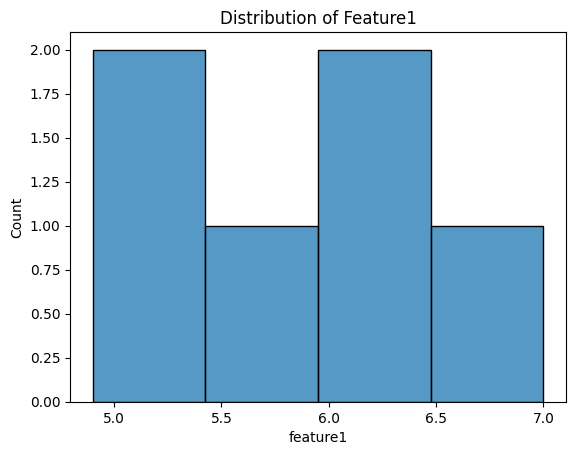

In [21]:



# Distribution of a feature
sns.histplot(ticks_df['feature1'])
plt.title('Distribution of Feature1')
plt.show()

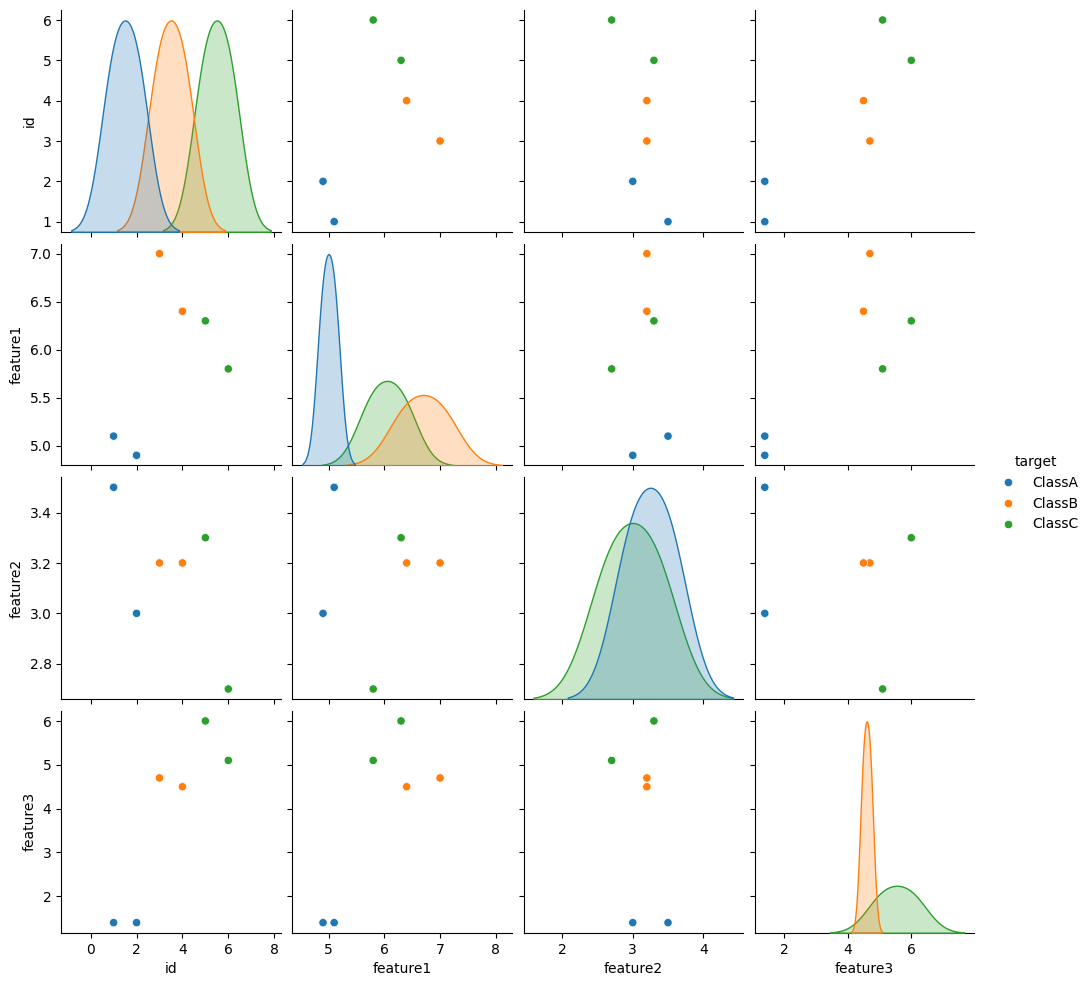

In [22]:
# Pairplot to visualize relationships between features
sns.pairplot(ticks_df, hue='target')
plt.show()

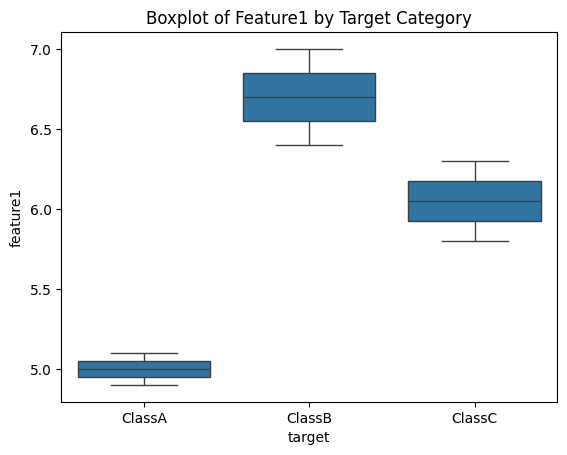

In [23]:
# Boxplot to see distribution of feature based on target categories
sns.boxplot(x='target', y='feature1', data=ticks_df)
plt.title('Boxplot of Feature1 by Target Category')
plt.show()

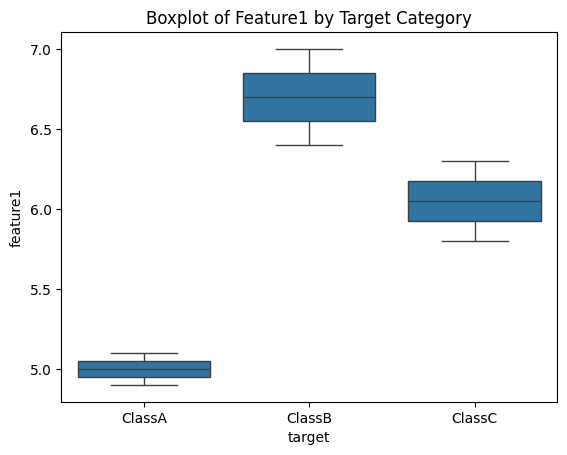

In [24]:
# Boxplot to see distribution of feature based on target categories
sns.boxplot(x='target', y='feature1', data=ticks_df)
plt.title('Boxplot of Feature1 by Target Category')
plt.show()

In [26]:
def predict_tick_category(row):
    # Example rule-based logic
    if row['feature1'] > 6:
        return 'ClassC'
    elif row['feature2'] < 3:
        return 'ClassA'
    else:
        return 'ClassB'

# Apply the rule-based prediction
ticks_df['predicted_category'] = ticks_df.apply(predict_tick_category, axis=1)

# Print the updated DataFrame
print(ticks_df.head())


   id  feature1  feature2  feature3  target predicted_category
0   1       5.1       3.5       1.4  ClassA             ClassB
1   2       4.9       3.0       1.4  ClassA             ClassB
2   3       7.0       3.2       4.7  ClassB             ClassC
3   4       6.4       3.2       4.5  ClassB             ClassC
4   5       6.3       3.3       6.0  ClassC             ClassC


Accuracy of Rule-Based Prediction: 16.67%
              precision    recall  f1-score   support

      ClassA       0.00      0.00      0.00         2
      ClassB       0.00      0.00      0.00         2
      ClassC       0.33      0.50      0.40         2

    accuracy                           0.17         6
   macro avg       0.11      0.17      0.13         6
weighted avg       0.11      0.17      0.13         6



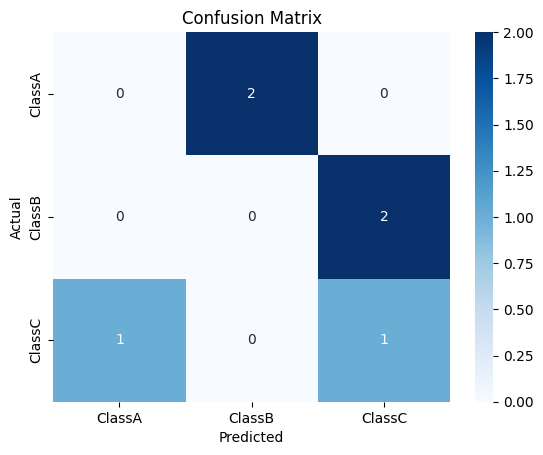

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure the target column exists
if 'target' in ticks_df.columns and 'predicted_category' in ticks_df.columns:
    # Calculate accuracy
    accuracy = accuracy_score(ticks_df['target'], ticks_df['predicted_category'])
    print(f"Accuracy of Rule-Based Prediction: {accuracy * 100:.2f}%")

    # Detailed classification report
    print(classification_report(ticks_df['target'], ticks_df['predicted_category']))

    # Confusion matrix
    confusion_matrix_df = pd.crosstab(ticks_df['target'], ticks_df['predicted_category'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Columns 'target' or 'predicted_category' are missing.")
